In [1]:
import pandas as pd, matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report
import seaborn as sns
sns.set()

In [4]:
dataset=pd.read_csv('credit_data.csv')

In [5]:
dataset.head(5)

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,Male,Graduate,Professional,None,None,186319,21625,Family,None,Married,0,1
1,18,Male,Under Graduate,Professional,None,None,277022,20442,Rented,None,Married,0,1
2,29,Male,Under Graduate,Salaried,None,Entry,348676,24404,Rented,None,Married,1,1
3,18,Male,Graduate,Student,None,None,165041,2533,Rented,None,Married,0,1
4,26,Male,Post Graduate,Salaried,None,Mid-level 1,348745,19321,Rented,None,Married,1,1


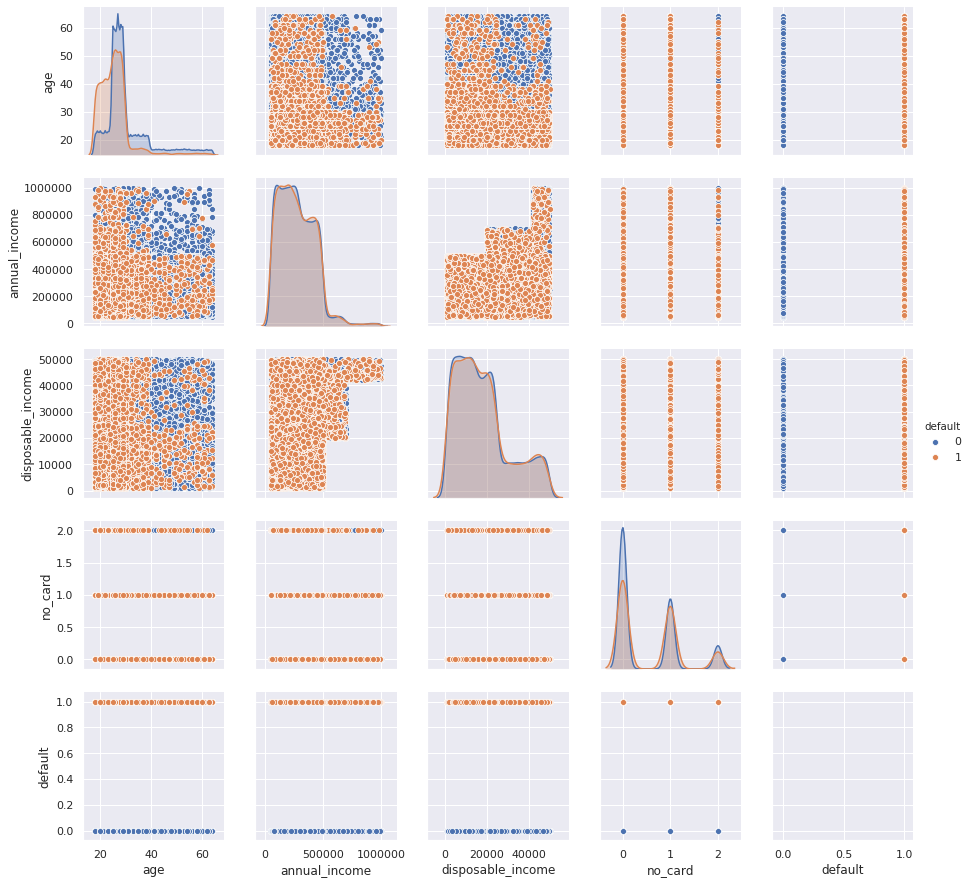

In [33]:
sns.pairplot(dataset,hue='default')

In [6]:
from sklearn.preprocessing import LabelEncoder

# now is the time for label encoding

In [7]:
col=[1,2,3,4,5,8,9,10]

In [8]:
for i in col:
    labelencoder=LabelEncoder()
    dataset.iloc[:,i]=labelencoder.fit_transform(dataset.iloc[:,i])
    

In [9]:
dataset.head()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
0,19,1,0,1,0,4,186319,21625,1,1,0,0,1
1,18,1,3,1,0,4,277022,20442,3,1,0,0,1
2,29,1,3,2,0,0,348676,24404,3,1,0,1,1
3,18,1,0,3,0,4,165041,2533,3,1,0,0,1
4,26,1,2,2,0,2,348745,19321,3,1,0,1,1


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50636 entries, 0 to 50635
Data columns (total 13 columns):
age                  50636 non-null int64
gender               50636 non-null int64
education            50636 non-null int64
occupation           50636 non-null int64
organization_type    50636 non-null int64
seniority            50636 non-null int64
annual_income        50636 non-null int64
disposable_income    50636 non-null int64
house_type           50636 non-null int64
vehicle_type         50636 non-null int64
marital_status       50636 non-null int64
no_card              50636 non-null int64
default              50636 non-null int64
dtypes: int64(13)
memory usage: 5.0 MB


In [11]:
dataset.describe()

,age,gender,education,occupation,organization_type,seniority,annual_income,disposable_income,house_type,vehicle_type,marital_status,no_card,default
count,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000,50636.000000
mean,29.527411,0.714650,1.051406,1.502291,0.736788,2.430109,277243.989889,18325.788569,2.308496,1.254108,0.783494,0.509815,0.158425
std,8.816532,0.451586,1.119741,0.872778,1.202856,1.454688,153838.973755,12677.864844,0.970239,0.527048,0.950451,0.669883,0.365142
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50000.000000,1000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,1.000000,0.000000,1.000000,154052.250000,8317.750000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,27.000000,1.000000,1.000000,2.000000,0.000000,2.000000,258860.500000,15770.000000,3.000000,1.000000,0.000000,0.000000,0.000000
75%,30.000000,1.000000,2.000000,2.000000,2.000000,4.000000,385071.500000,24135.000000,3.000000,2.000000,2.000000,1.000000,0.000000
max,64.000000,1.000000,3.000000,3.000000,3.000000,5.000000,999844.000000,49999.000000,3.000000,2.000000,2.000000,2.000000,1.000000


In [12]:
columns=list(dataset.columns)


In [16]:
plt.style.use('ggplot')
# plt.style.available

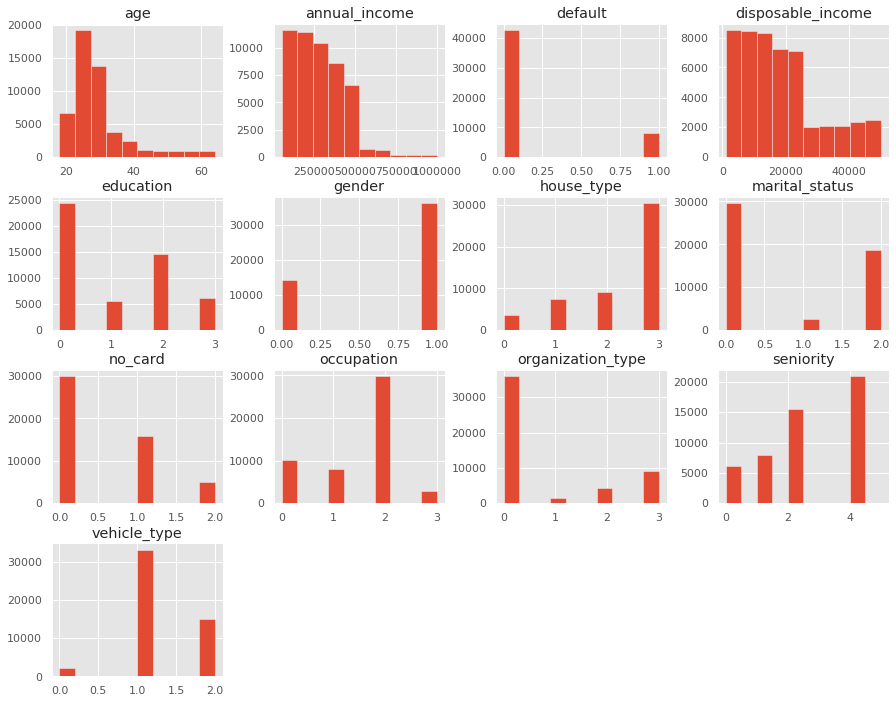

In [17]:

a=dataset.hist(figsize=(15,12))
plt.grid(False)
plt.show()



# train test splitting the dataset

In [20]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [21]:
print(x.shape,y.shape)

(50636, 12) (50636,)


In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# creating a decision classifier (entropy)

In [45]:
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
y_ent_pred=classifier.predict(x_test)

In [47]:
print(accuracy_score(y_test,y_ent_pred)*100)

78.67158185767889


In [48]:
confusion_matrix(y_test,y_ent_pred)

array([[11100,  1679],
       [ 1561,   851]])

In [49]:
print(classification_report(y_test,y_ent_pred))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     12779
           1       0.34      0.35      0.34      2412

   micro avg       0.79      0.79      0.79     15191
   macro avg       0.61      0.61      0.61     15191
weighted avg       0.79      0.79      0.79     15191



# creating a decision classifier (gini)

In [50]:
classifier1=DecisionTreeClassifier(criterion='gini')
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
y_gini_pred=classifier1.predict(x_test)

In [52]:
print(accuracy_score(y_test,y_gini_pred)*100)

78.28319399644526


In [53]:
print(confusion_matrix(y_test,y_gini_pred))

[[11031  1748]
 [ 1551   861]]


In [54]:
print(classification_report(y_test,y_gini_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     12779
           1       0.33      0.36      0.34      2412

   micro avg       0.78      0.78      0.78     15191
   macro avg       0.60      0.61      0.61     15191
weighted avg       0.79      0.78      0.79     15191



In [ ]:
'just want to ask a question if what will be the outpout if we random forest will it increase the accuracy'